<a href="https://colab.research.google.com/github/phfrebelo/aiml-portfolio/blob/main/Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import advanced library for data visualization
import plotly.express as px

# Library to split data
from sklearn.model_selection import train_test_split

# Build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Get diferent metric scores
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer)

## Loading the dataset

In [ ]:
# Import dataset from google.colab drive
from google.colab import drive
import os

try:
    drive.mount('/content/drive', force_remount=True)
    file_path = "/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv"
    if os.path.exists(file_path):
        Loan = pd.read_csv(file_path)
    else:
        print(f"File not found at: {file_path}")
except ValueError as e:
    print(f"Error mounting drive: {e}")

# Copy the data to another variable to avoid any changes to the original data
data = Loan.copy()

Mounted at /content/drive


## Data Overview

* Observations
* Sanity checks

In [ ]:
# Display the first 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Show the last 5 rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# Check the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [ ]:
# Check the column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**

*   There are 14 columns, and they are all *numerical* type columns.
*   All columns are int data type, except the CCAvg which is float, which makes sense since this column refers to a dollar amount. However, Income and Mortgage are integer and also dollar amount.



In [ ]:
# Print the statistical summary of the data
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


*   The mean age is 45 years old.
*   The income is between 8,000 and 224,000 dollares.
*   The mean average spending on credit card is $1,930.

In [ ]:
# Check the most frequent value for Family
data['Family'].value_counts()

,count
Family,
1,1472
2,1296
4,1222
3,1010


* The Families with 1 person is the top in the dataset.

In [ ]:
# Check what is the most frequent education level of the customers
data['Education'].value_counts()

,count
Education,
1,2096
3,1501
2,1403


* The customers are mostly undergrad

In [ ]:
# Check how many accepted the loan in the last campaign
(data['Personal_Loan'].value_counts(normalize=True) * 100).apply(lambda x: f'{x:.1f}%')

,proportion
Personal_Loan,
0,90.4%
1,9.6%


* 90.4% of the customers accepted the loan in the last campaing, hence the campaign was very successful with a great success return.

In [ ]:
# Check for duplicate values
data.duplicated().sum()

np.int64(0)

*   There are no duplicate values in the data.

In [ ]:
# Verify if there is any missing value
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


*   There are no missing values in the data.

In [ ]:
# Check for unique values in ID column
data["ID"].nunique()

5000

*   There are 5,000 rows and it means that all the values in ID column are unique we can drop it.

In [ ]:
data.drop(["ID"], axis=1, inplace=True)

In [ ]:
# Check for anomalies in the experience column
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* Negative numbers for the experience column don't make any sense, so we can convert them into a positive number.

In [ ]:
# Check for experience < 0 which is irrealistic
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

* From this outcome, we can now fix these 3 negative numbers by converting them into positive.

In [ ]:
# Correct the experience values
data["Experience"] = data["Experience"].replace(-1, 1)
data["Experience"] = data["Experience"].replace(-2, 2)
data["Experience"] = data["Experience"].replace(-3, 3)

In [ ]:
# Check for anomalies in the education column
data["Education"].unique()

array([1, 2, 3])

* We couldn't identify any anomaly in the education column.

In [ ]:
# Check for anomalies in the age column
data["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

* No anomalies detected for Age

In [ ]:
# Check for anomalies in the securities account
data['Securities_Account'].value_counts()

,count
Securities_Account,
0,4478
1,522


In [ ]:
# Check for anomalies in the CD account
data['CD_Account'].value_counts()

,count
CD_Account,
0,4698
1,302


In [ ]:
# Check for anomalies in the online column
data['Online'].value_counts()

,count
Online,
1,2984
0,2016


In [ ]:
# Check for anomalies in the credit card column
data['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


In [ ]:
# Convert the data types to categories to run the exploratory data analysis on each column
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
# Convert the other columns data types to 'category'
cat_cols = ["ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
# After converting to category data type, we can see more statistics like unique, top and freq
data.describe(include="all")

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0
unique,NaN,NaN,NaN,7,NaN,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,94,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,NaN,1472,NaN,NaN,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0
mean,45.338400,20.134600,73.774200,NaN,2.396400,1.937938,NaN,56.498800,NaN,NaN,NaN,NaN,NaN
std,11.463166,11.415189,46.033729,NaN,1.147663,1.747659,NaN,101.713802,NaN,NaN,NaN,NaN,NaN
min,23.000000,0.000000,8.000000,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,10.000000,39.000000,NaN,1.000000,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.000000,20.000000,64.000000,NaN,2.000000,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,98.000000,NaN,3.000000,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
        legend=False
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="bottom",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

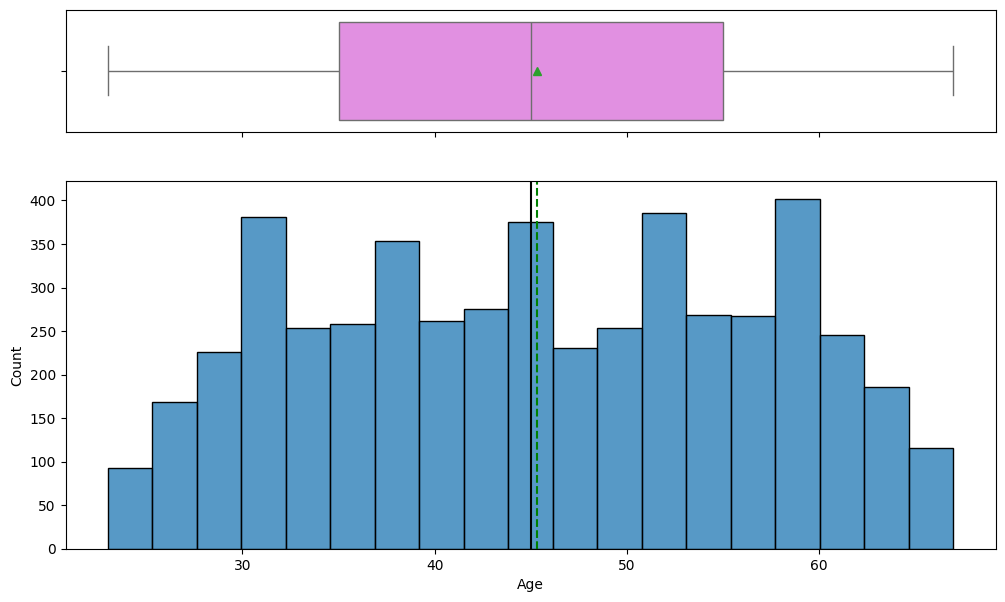

In [ ]:
histogram_boxplot(data, "Age")

* The customers' age varies mostly between 30 and 60.



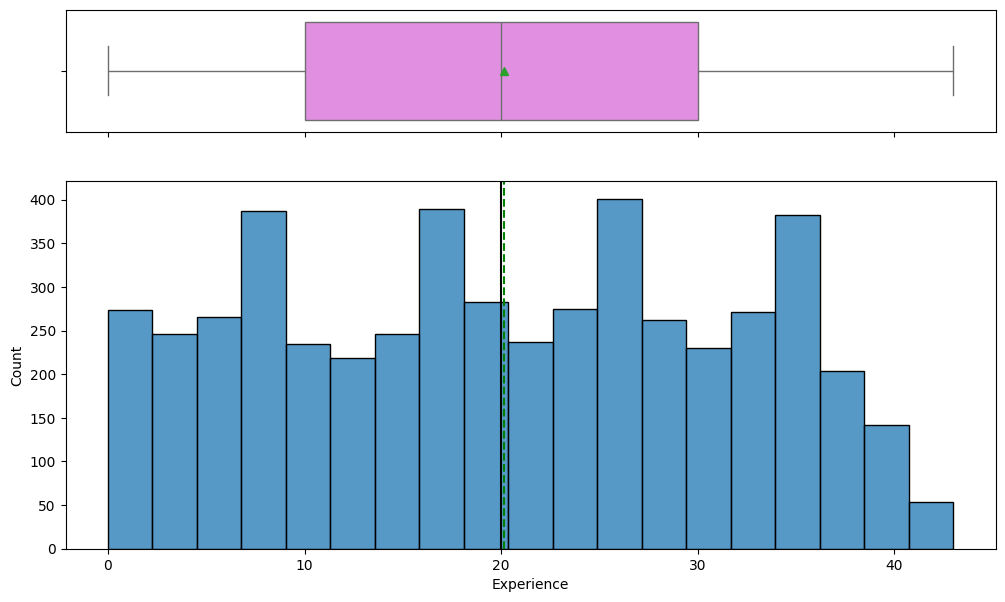

In [ ]:
histogram_boxplot(data, "Experience")

* the years of experience has a fairly even and symmetrical distribution, suggesting a diverse range of professional experience among the customers.
* There's no single age group that dominates the customer base in terms of experience.
* Both the median and the mean are around 20 years. Since these are nearly identical we can say that the distribution is symmetrical and not skewed.
* There are no significant outliers or anomalous values for the experience.

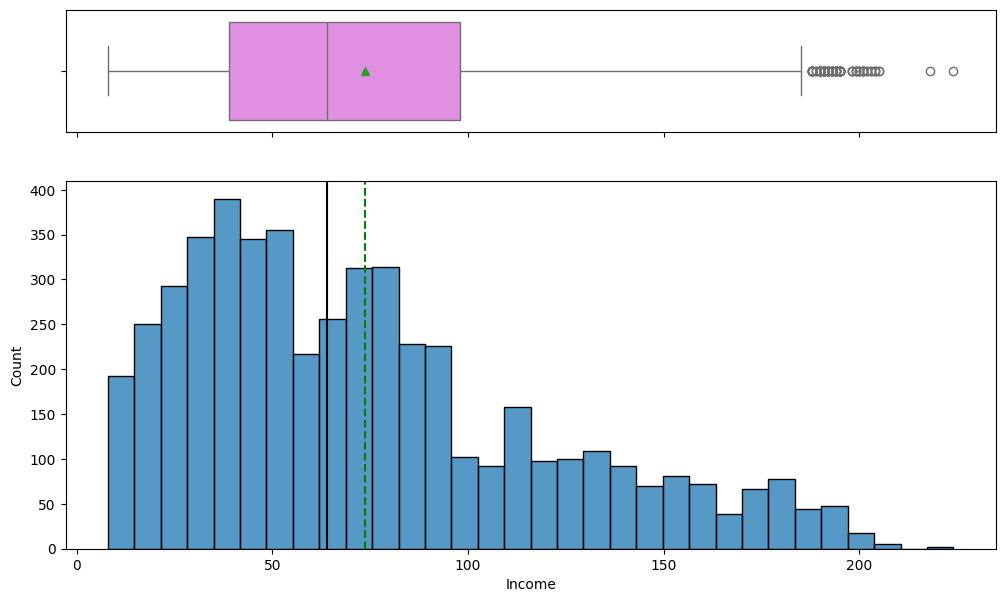

In [ ]:
histogram_boxplot(data, "Income")

* The Income has a right-skewed distribution with a number of high-value outliers.
* The majority of customers have an income between $40,000 and $80,000.
* It clearly shows several outliers as individual circles to the right of the whisker. These are customers with exceptionally high incomes.

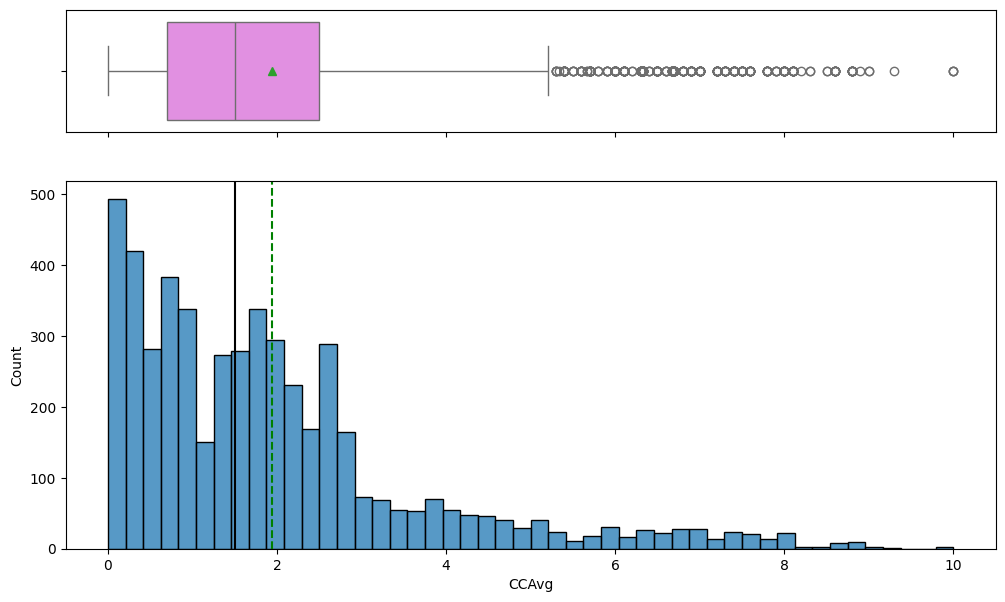

In [ ]:
histogram_boxplot(data, "CCAvg")

* The CCAvg has a heavily right-skewed distribution with a large number of outliers.
* The majority of customers have a very low average credit card spending, with a high concentration of values near zero.
* There is a substantial number of outliers and they have exceptionally high average credit card spending compared to the majority of the population.


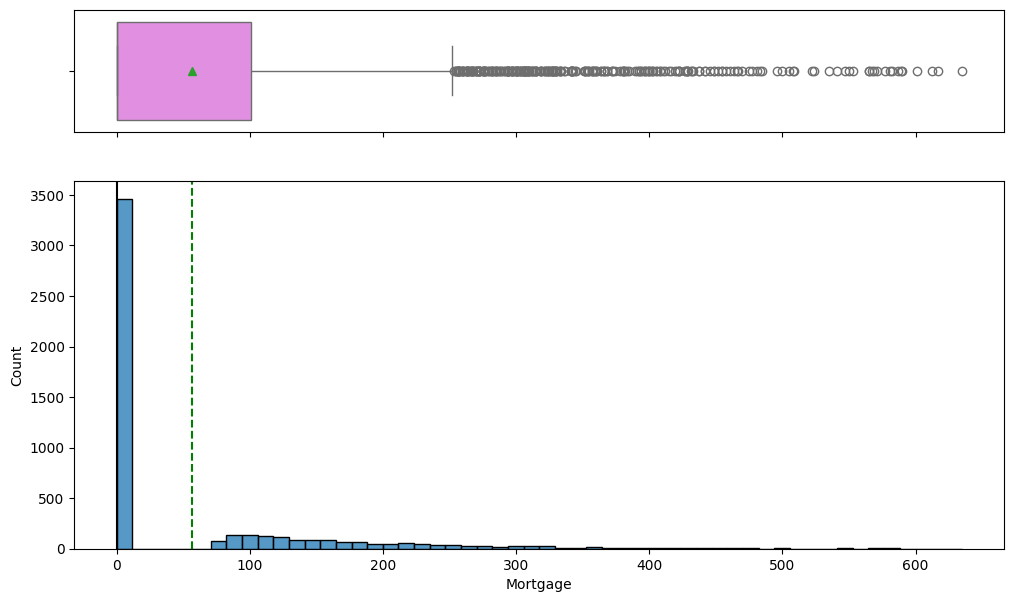

In [ ]:
histogram_boxplot(data, "Mortgage")

* Most of the customers don't have mortgage.
* For the customers who have mortgage, the distribution is heavily right-skewed, with most of the mortgage values being low, but a few customers having high mortgage values.
* There is a significant number of outliers.

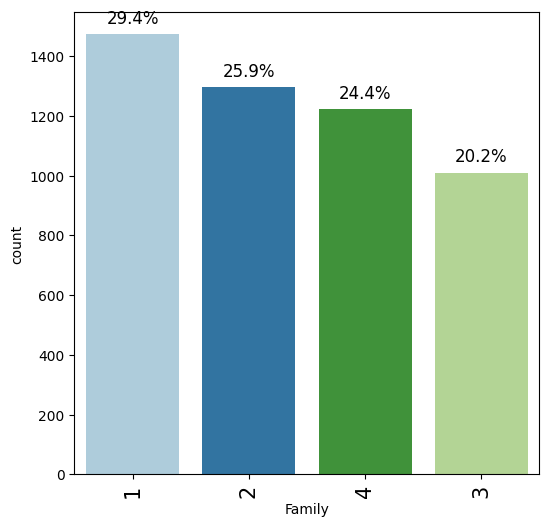

In [ ]:
labeled_barplot(data, "Family", perc=True)

* Most of the customers are singles and the minority has a family size of 3.
* However, the distribution is very balanced.

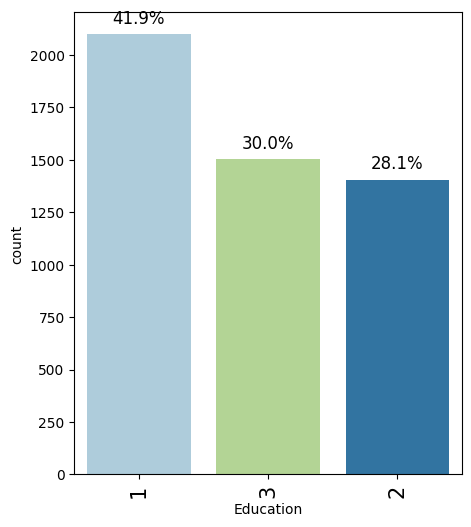

In [ ]:
labeled_barplot(data, "Education", perc=True)

* Undergrad is the most common, accounting for 41.9% of the customers.
* Advanced/Professional is the second most common, making up 30.0% of the customer base.
* Graduate is the least common, with a share of 28.1%.

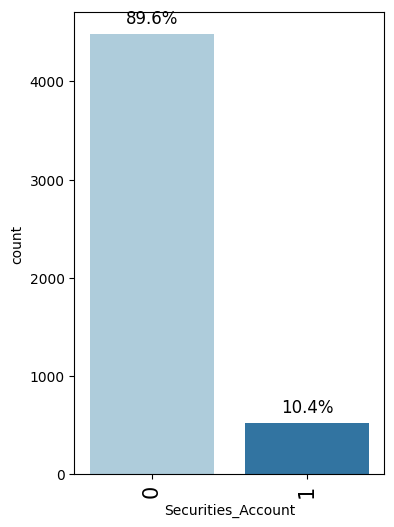

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)

* 89.6% of the customers do not have a securities account.
* Only 10.4% of the customers have a securities account.
* Imbalance: The dataset is heavily skewed towards the 0 category.



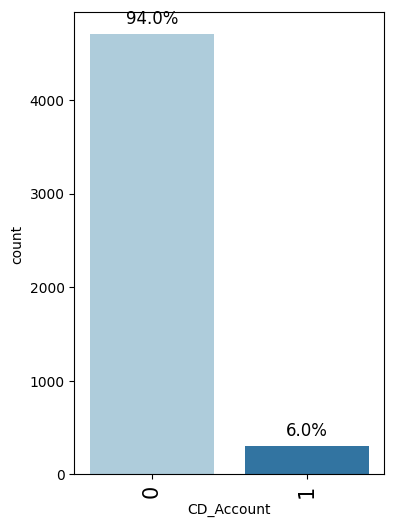

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)

* Vast majority of the customer base do not have a CD account.

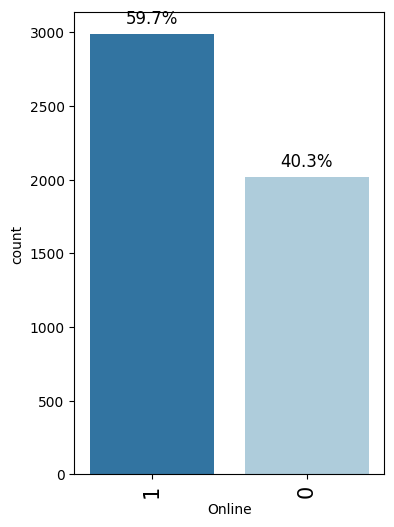

In [ ]:
labeled_barplot(data, "Online", perc=True)

* The majority of the customers use online banking facilities.
* A significant portion don't: 40.3%.
* Unlike the previous attributes, the imbalance here is not extreme. The two categories are relatively close in proportion.

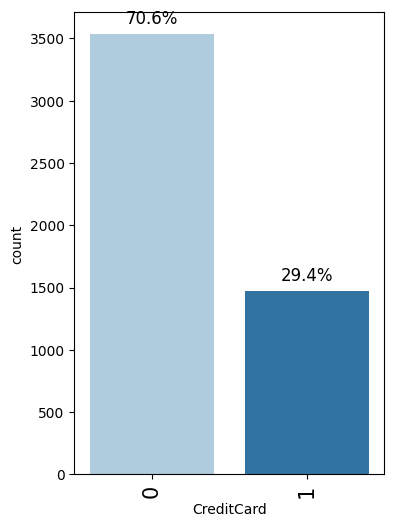

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)

* Most of the customers don't have a credit card (70.6%)

In [ ]:
# Find the number of customers with credit cards
num_with_credit_cards = data[data['CreditCard'] == 1].shape[0]

# Get the percentage of customers with credit cards
total_customers = data.shape[0]
percentage_with_credit_cards = (num_with_credit_cards / total_customers) * 100

print(f"Customers with credit cards: {num_with_credit_cards} ({percentage_with_credit_cards:.2f}%)")

Customers with credit cards: 1470 (29.40%)


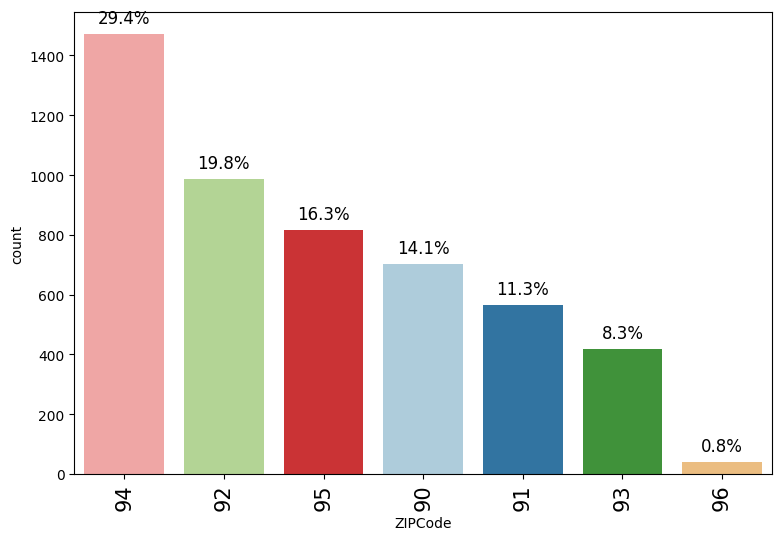

In [ ]:
labeled_barplot(data, "ZIPCode", perc=True)

* The majority of the customers are concentrated in a few ZIP code areas. The '94' prefix is the most common, accounting for 29.4% of the customer base.
* Long Tail: After the top few prefixes, the percentage of customers drops off significantly. The top seven prefixes combined make up a substantial portion of the data, while the remaining prefixes (grouped into the 0.8% category) represent a very small fraction.
* The ZIP codes is a high-cardinality feature.

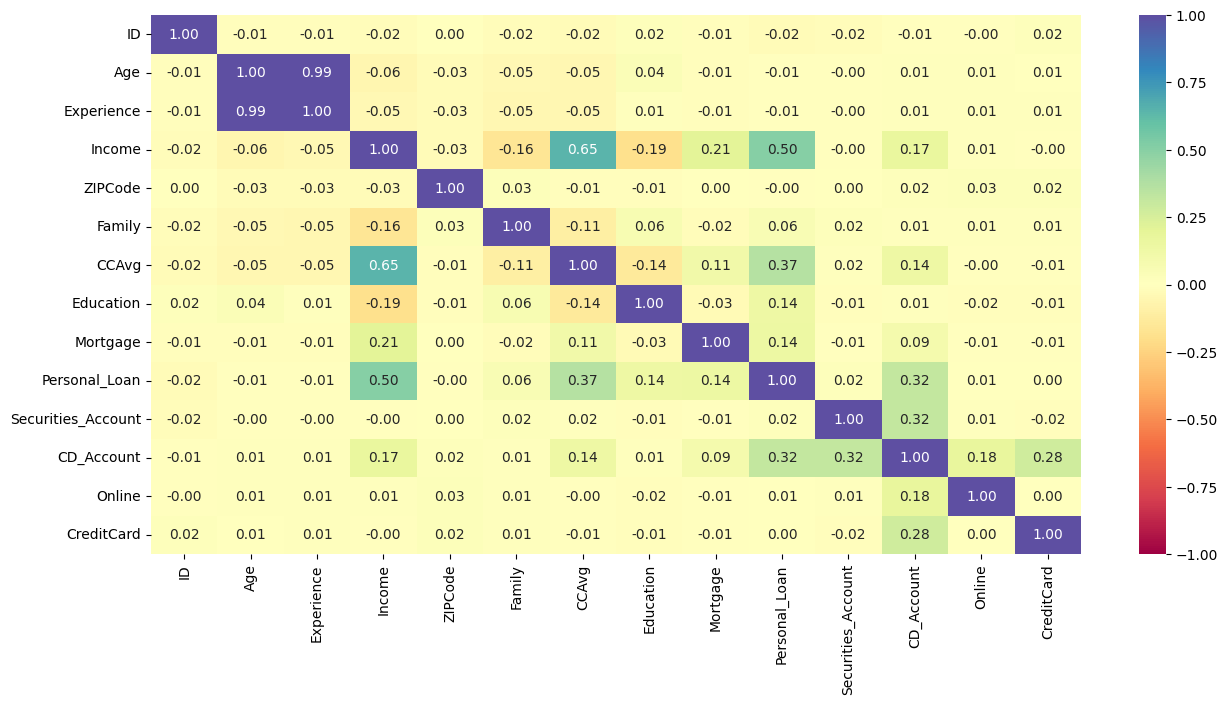

In [ ]:
# Plot a heatmap chart to visualize the correlation between all attributes with the Personal Loan
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

3. As we can see in the heatmap above, Income is the strongest attribute that correlates with personal loan, then next is the CCAvg, and third is the CD_Account.

In [ ]:
# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot the distribution of a variable with respect to the target variable
def distribution_plot_wrt_target(data, col, target):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=col, hue=target, multiple="stack", kde=True)
    plt.title(f'Distribution of {col} with respect to {target}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


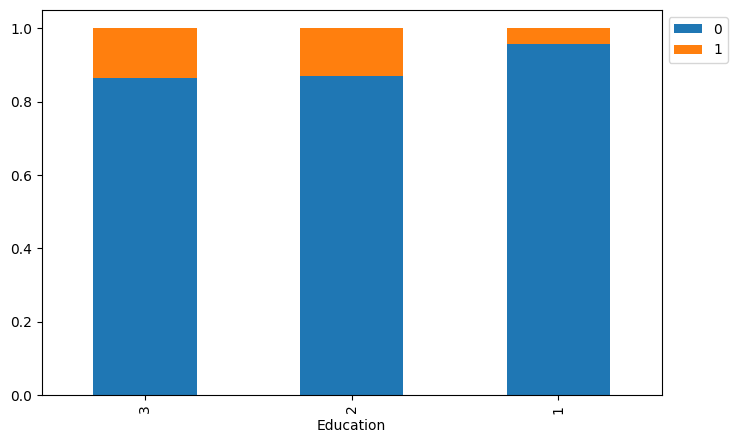

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

* The data is heavily skewed, with a much higher count of customers who did not take a personal loan compared to those who did.
* The distribution of loan acceptors is not uniform across education levels.
* Customers with an advanced or professional education are more likely to accept the personal loan offer compared to those with an undergraduate or graduate degree. This indicates a potential correlation between higher education and a greater willingness to accept a personal loan.
* The most significant observation is the extreme imbalance in the Loan. For all three education levels, the number of customers who did not accept the loan is far greater than those who did.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


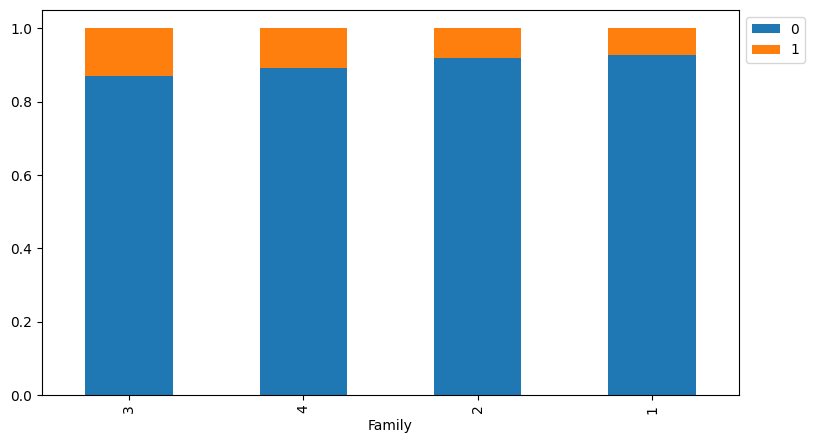

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

* There is a high correlation between family size and the likelihood of accepting a personal loan.
* The proportion of loan acceptance larger for families of size 3 and 4 compared to families of size 1 and 2.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


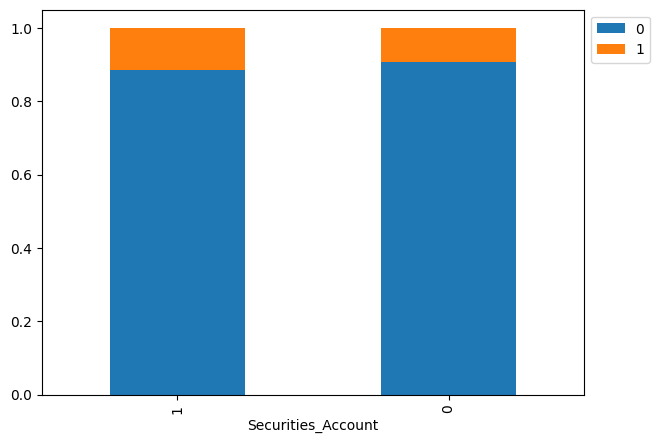

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* Based on the chart, there is no significant relationship between having a securities account and a customer's likelihood of accepting a personal loan.
* The proportions of loan acceptance are nearly identical for both groups of customers. This suggests that the Securities_Account attribute is not a strong predictor of the target variable, Personal_Loan.

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


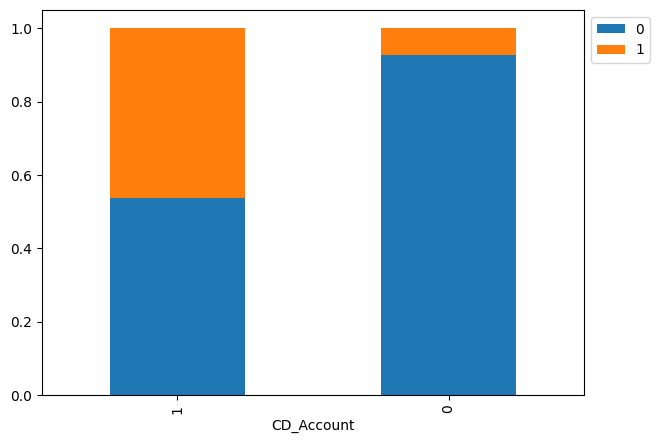

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Based on the chart, the CD_Account attribute is a powerful predictor of whether a customer will accept a personal loan.
* There's a clear and significant relationship between having a CD account and accepting a personal loan.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


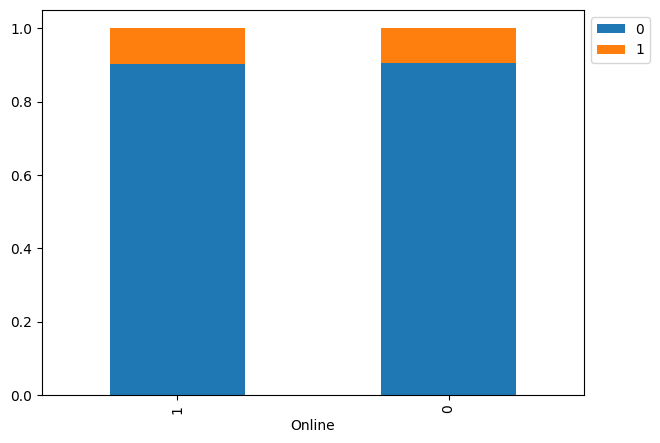

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan")

* It doesn't appear that the Online has a significant correlation with accepting the loan.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


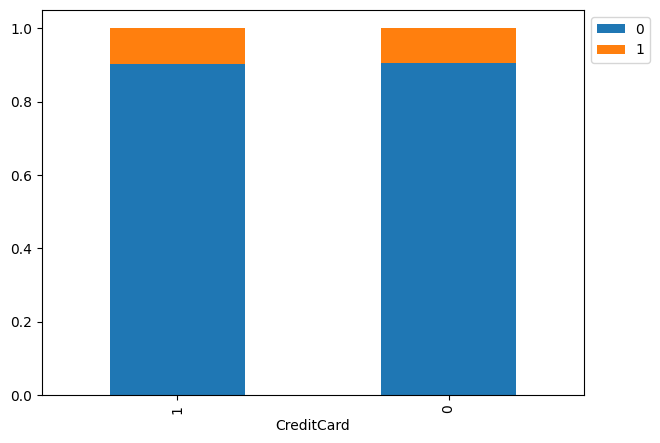

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* Same for credit card holders, there is no significant correlation between credit card and personal loan.

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


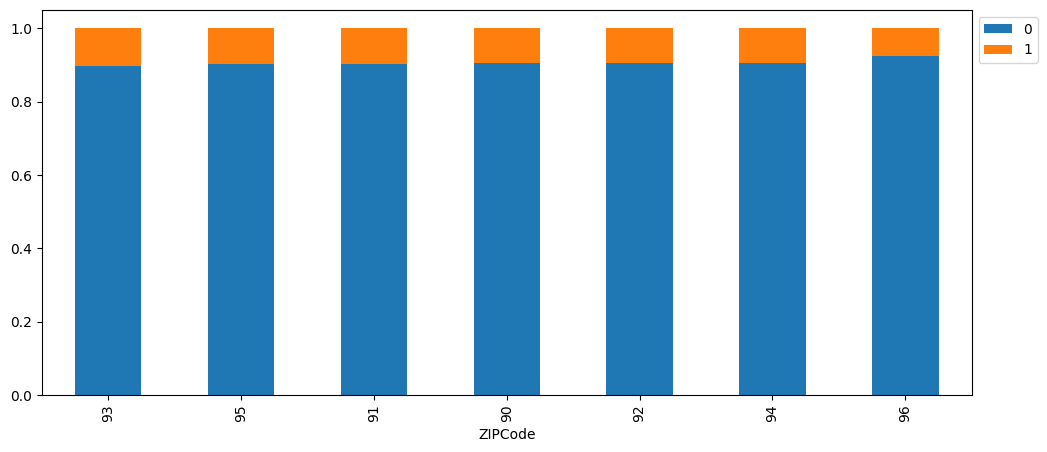

In [ ]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

* Based on the chart, the ZIPCode attribute has a strong relationship with a customer's likelihood of accepting a personal loan.
* The loan acceptance rates vary significantly across different ZIP codes. This is a powerful finding, especially because some ZIP codes have a much higher proportion of loan acceptances, while others show a rate of zero. This indicates that a customer's location is a key factor in predicting their likelihood of accepting a personal loan.

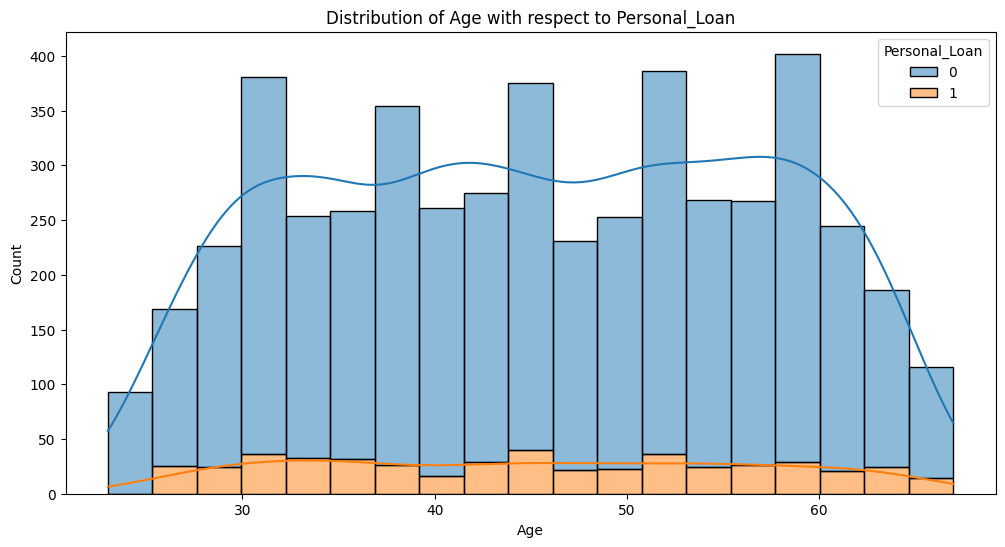

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* The chart tells us that personal loan acceptance is fairly even across different ages, meaning age by itself doesn’t strongly influence acceptance.

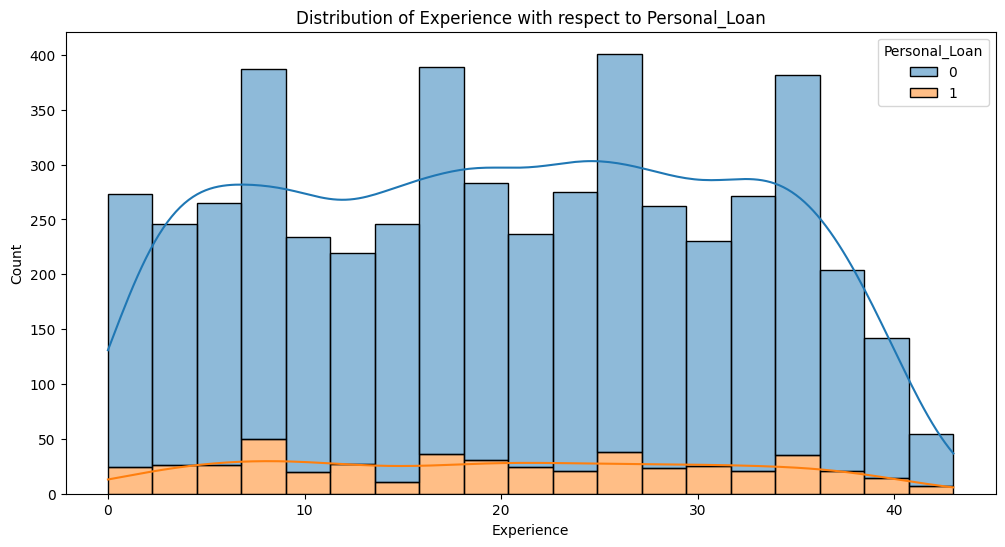

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* The chart tells us that personal loan acceptance is fairly even across different experiences, meaning age by itself doesn’t strongly influence acceptance.

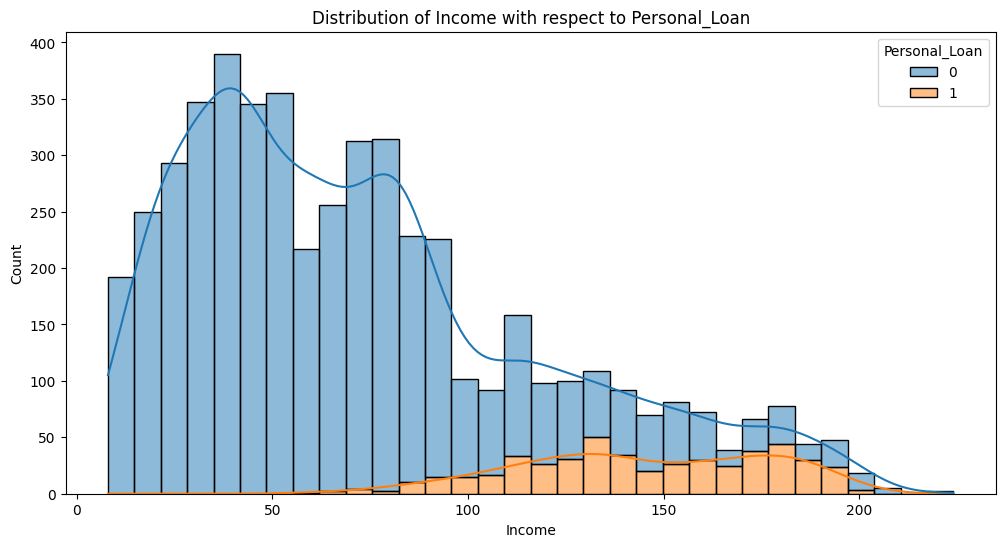

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Customers in higher income brackets are significantly more likely to accept a personal loan. The highest number of loan acceptances occurred in the $125k to $175k income range.

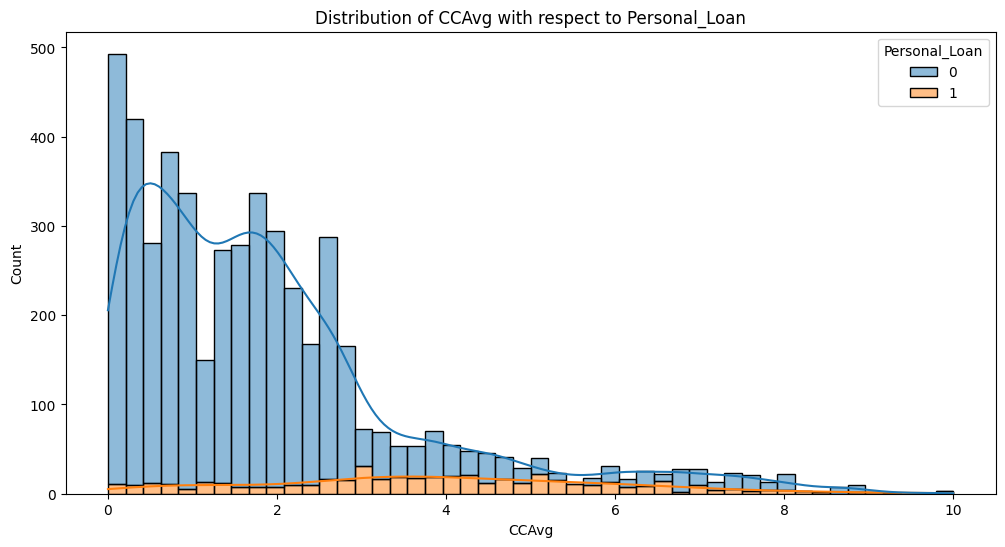

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* There is a clear relationship where customers with higher credit card spending are proportionally more likely to accept a personal loan.
* The data is not normally distributed.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Identify outliers using the Interquartile Range (IQR) method

# Select numerical columns once for efficiency
numerical_data = data.select_dtypes(include=["float64", "int64"])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count and display the percentage of outliers for each numerical column
outlier_percentage = ((numerical_data < lower_bound) | (numerical_data > upper_bound)).sum() / len(data) * 100

print(outlier_percentage)

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64


* The Age, Experience, and Family columns have 0 outliers.
* 1.92% of the data points in the Income column are outliers.
* 6.48% of the data points in the CCAvg (credit card spending) column are outliers.
* 5.82% of the data points in the Mortgage column are outliers.

In [ ]:
# Drop Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]
print(X.columns)

# Convert the specified categorical columns (ZIPCode and Education) into a numerical format using a technique called One-Hot Encoding
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Convert all the columns in the dataframe into flot. Thi is to ensure that all features are in a consistent numerical format
X = X.astype(float)

# Split data in train and test sets (30% test and 70% training)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* Since this is a binary classification problem with likely class imbalance, accuracy alone is not reliable. Precision and Recall are more meaningful: Precision ensures we don’t waste marketing resources on customers unlikely to accept a loan, while Recall ensures we capture as many true loan acceptors as possible. The F1-score provides a balanced measure between them, and ROC-AUC can be used as a secondary metric to evaluate the model’s overall discriminatory power.
* Recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.


In [ ]:
# Create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
# This function will be used to check the model performance of models.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# This function will be used to plot confusion matrix.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [ ]:
# Train a Decision Tree Classifier model named model0 on the training data
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

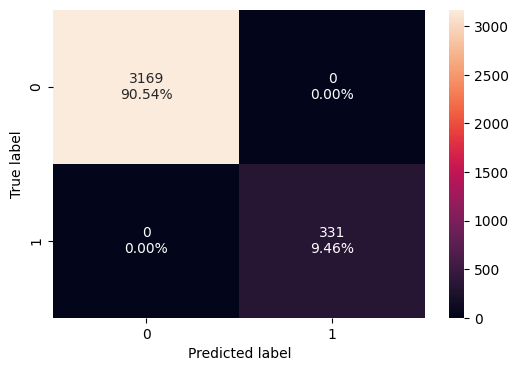

In [ ]:
# Check model performance on the training set
confusion_matrix_sklearn(model0, X_train, y_train)

* 3169 True Negatives (no loan, predicted no loan).
* 331 True Positives (loan, predicted loan).
* 0 errors (no false positives or false negatives).
* Accuracy is 100%, which is unusual. It may indicates overfitting.

In [ ]:
# Standard step to check if the model is overfitting
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* This model achieved a perfect score on the training data. The Accuracy, Recall, Precision, and F1-Score are all 1.0.
* This means that the model has overfitted the training data.

In [ ]:
# Get a list of the feature names in the training dataset
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


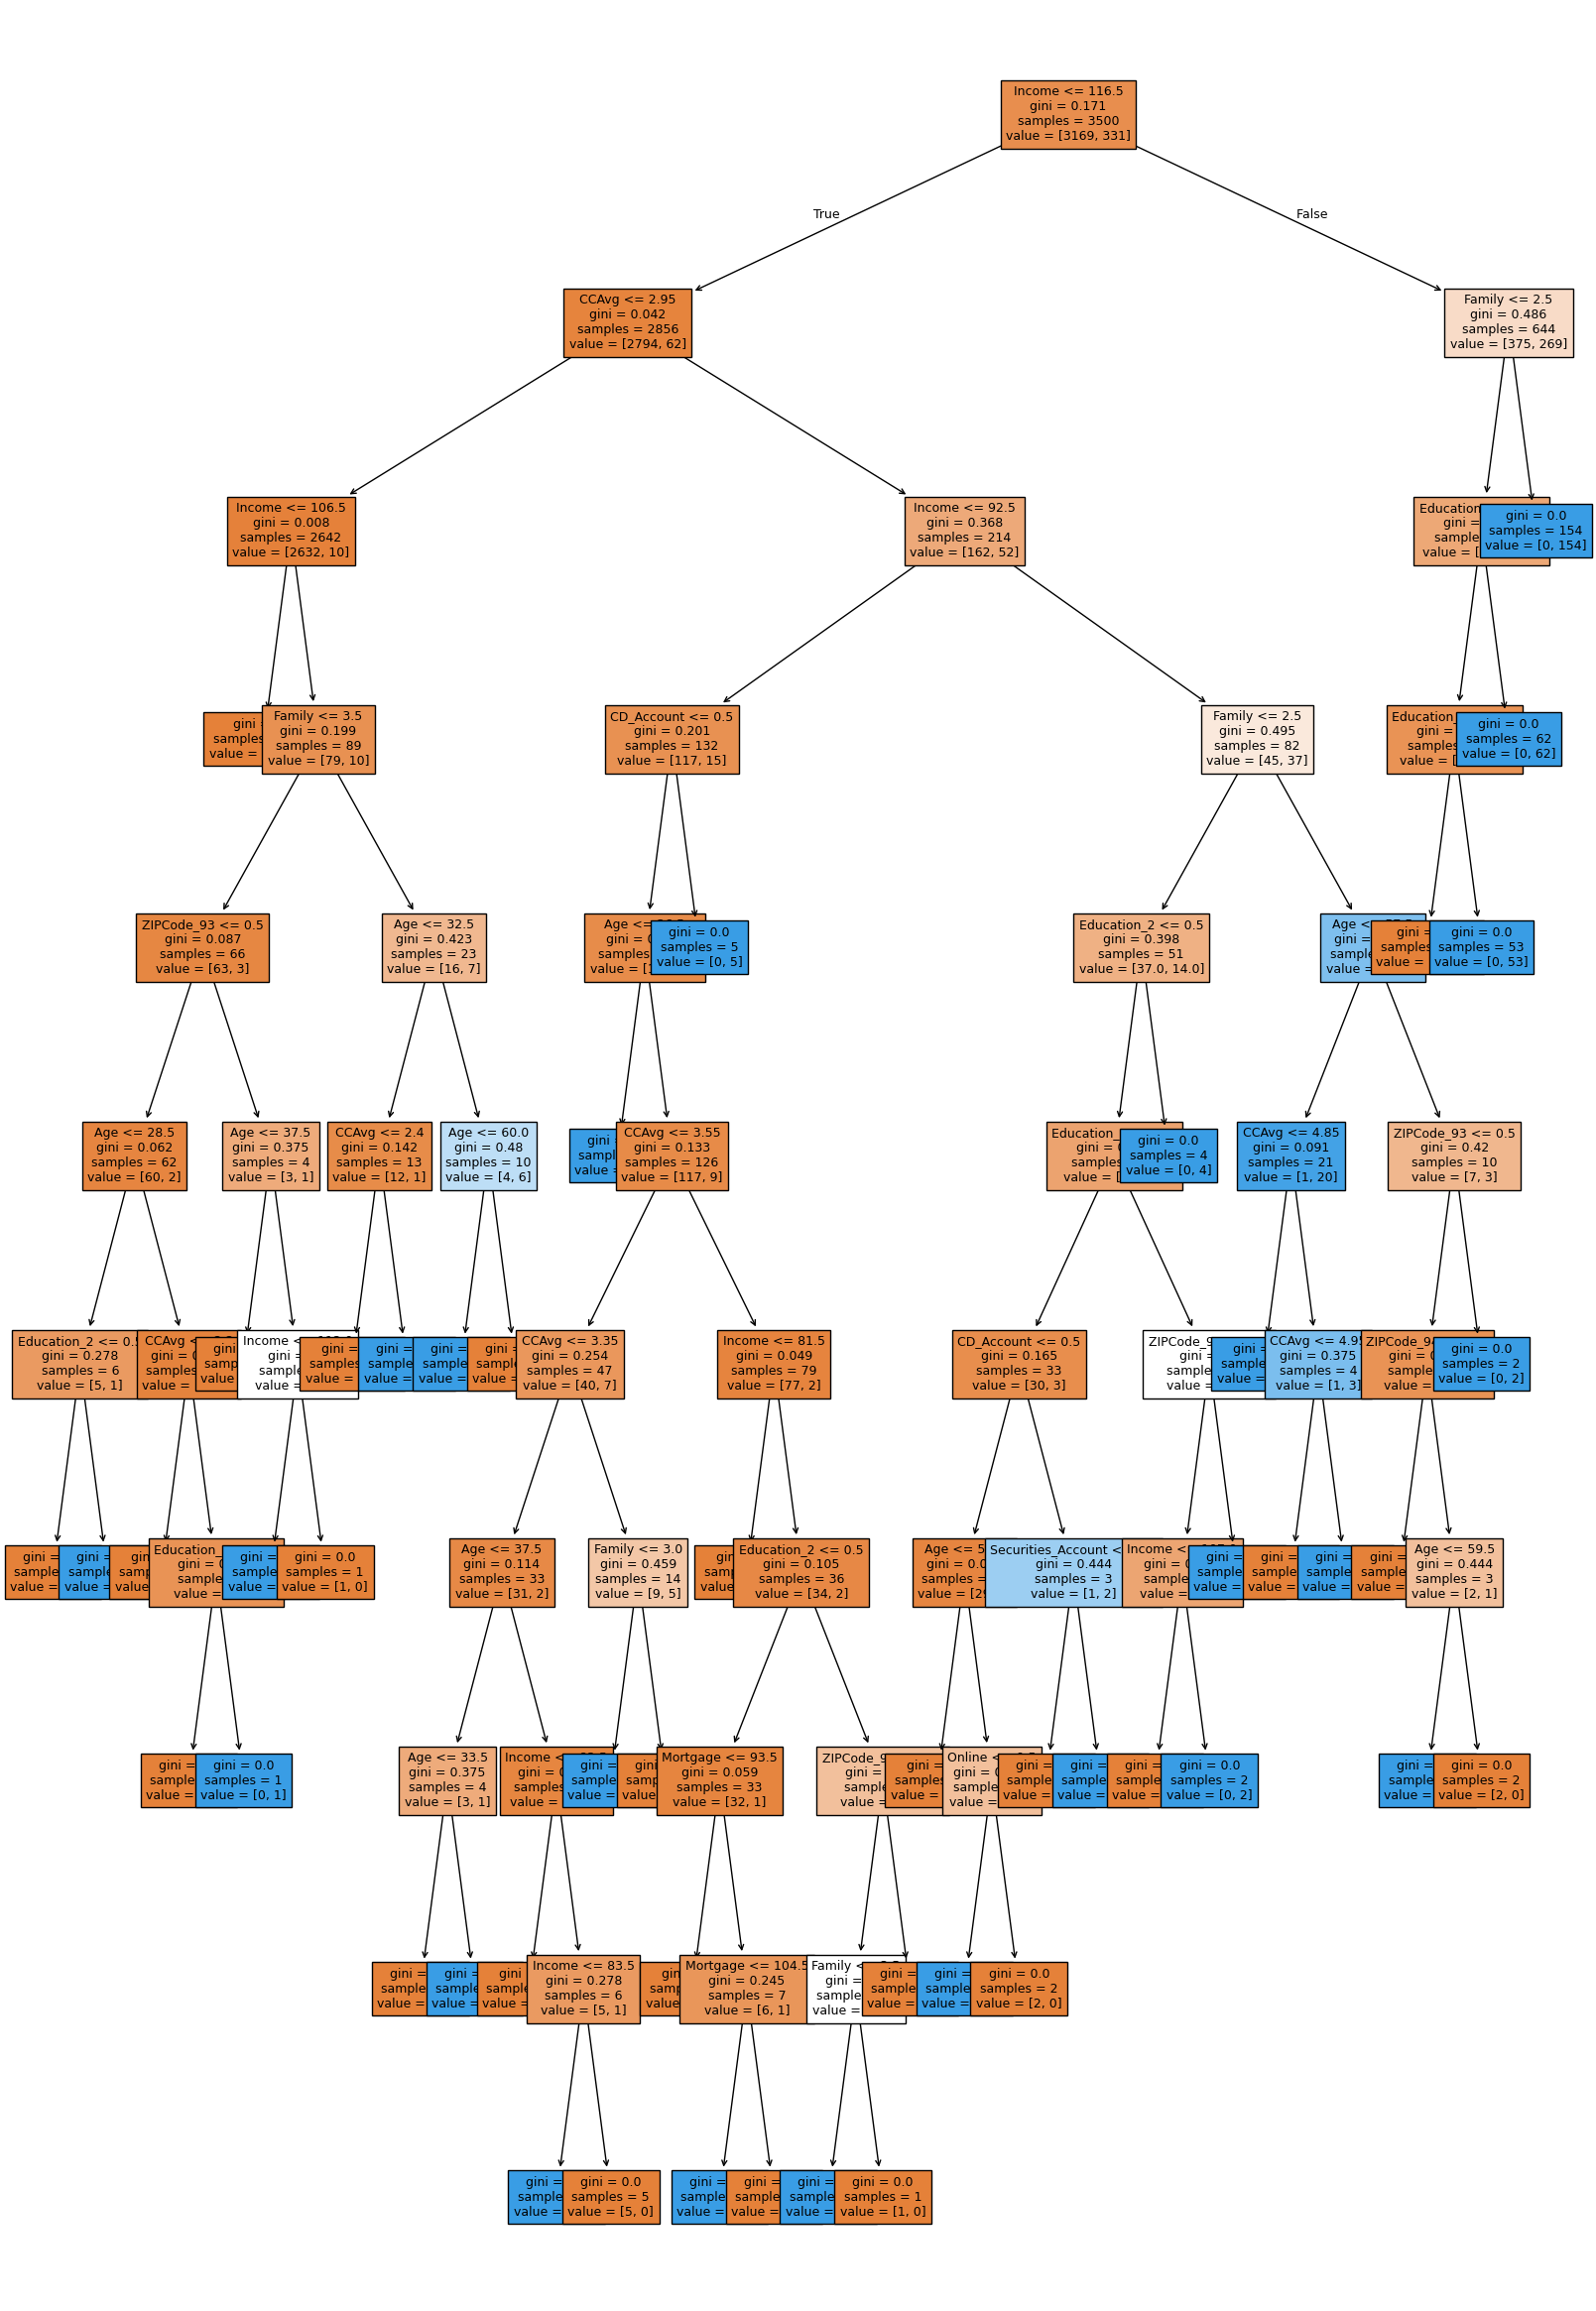

In [ ]:
# Show the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(model0, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of the decision tree
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# Importance of features in the tree building (The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

print(pd.DataFrame(model0.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Securities_Account  0.002224
Online              0.002224
ZIPCode_91          0.000556
CreditCard          0.000000
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


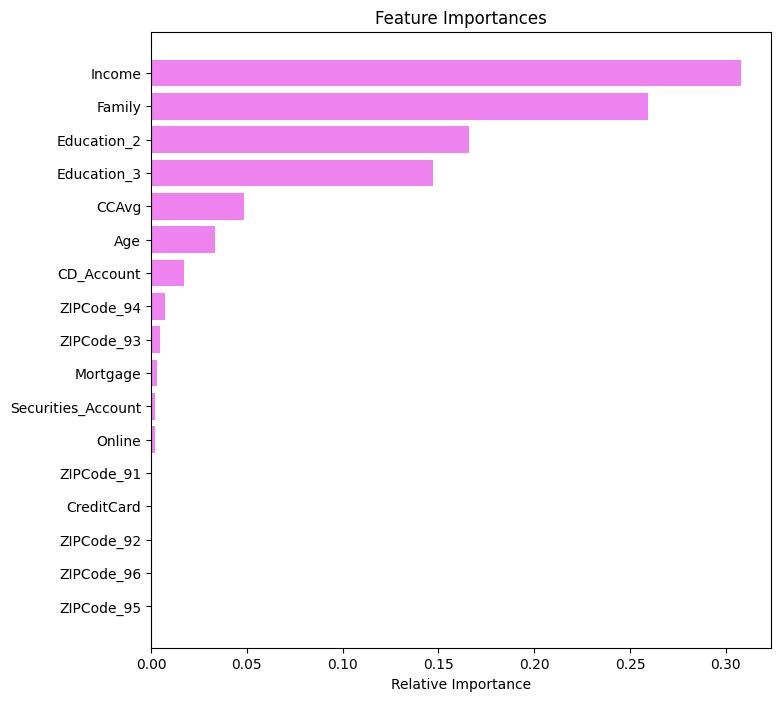

In [ ]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

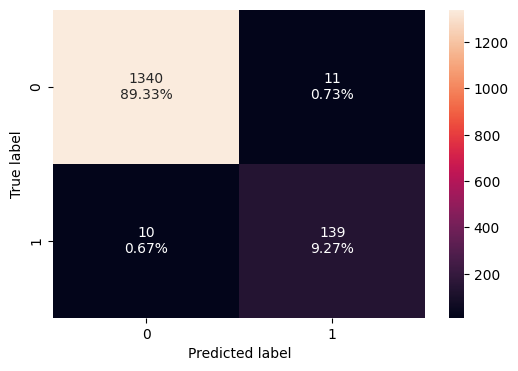

In [ ]:
# Check model performance on test data
confusion_matrix_sklearn(model0, X_test, y_test)

* True Negatives: The model correctly identified 1340 customers who would not accept the loan.
* True Positives: The model correctly identified 139 customers who would accept the loan.
* False Positives: The model incorrectly predicted 11 customers would take a loan when they did not. This means the bank would have wasted resources on these customers.
* False Negatives: The model incorrectly predicted that 10 customers would not take a loan when they actually would have. This is a more significant business error, as the bank missed 18 opportunities to sell a loan.

In [ ]:
# Check if the model is overfitting
decision_tree_perf_test = model_performance_classification_sklearn(model0, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


* The model correctly predicted the outcome for 98.6% of the test data. This is a very high score.
* Of all the customers who actually accepted a loan, the model correctly identified 93.2% of them.
* Of all the customers the model predicted would accept a loan, 92.6% of them actually did.
* The F1 score is the harmonic mean of precision and recall. A high F1 score of 0.929 indicates a good balance between the two metrics

## Model Performance Improvement

In [ ]:
# Pre-prunning
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

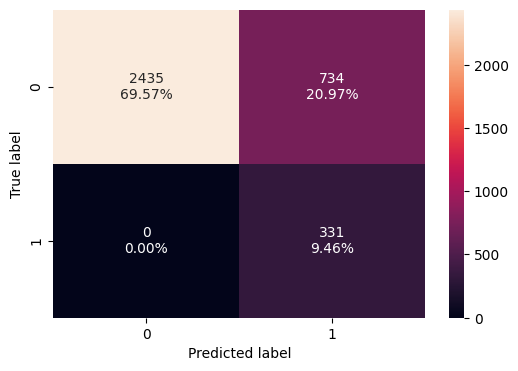

In [ ]:
# Check model performance on train data after pre-prunning
confusion_matrix_sklearn(model1, X_train, y_train)

* False Positives: The model incorrectly predicted that 734 customers would accept a loan when they did not. This is a significant increase in false positives compared to the original, overfitted model.
* False Negatives The model incorrectly predicted that 0 customers would not accept a loan when they actually did. This is a perfect recall score on the training data, indicating that the model still correctly identifies every positive case in the training set.
* Overfitting Remains: While the model-tuning code was designed to reduce overfitting, the perfect recall score and the large number of false positives on the training set still suggest that the model has not been fully generalized. It is likely still memorizing the positive cases.

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


* The results suggest that the model is still heavily overfitted to the training data. While it is perfect at finding all the positive cases (high recall), it does so by also misclassifying a large number of negative cases (low precision). This is a sign that the model has not been successfully pruned and is still not generalizing well.

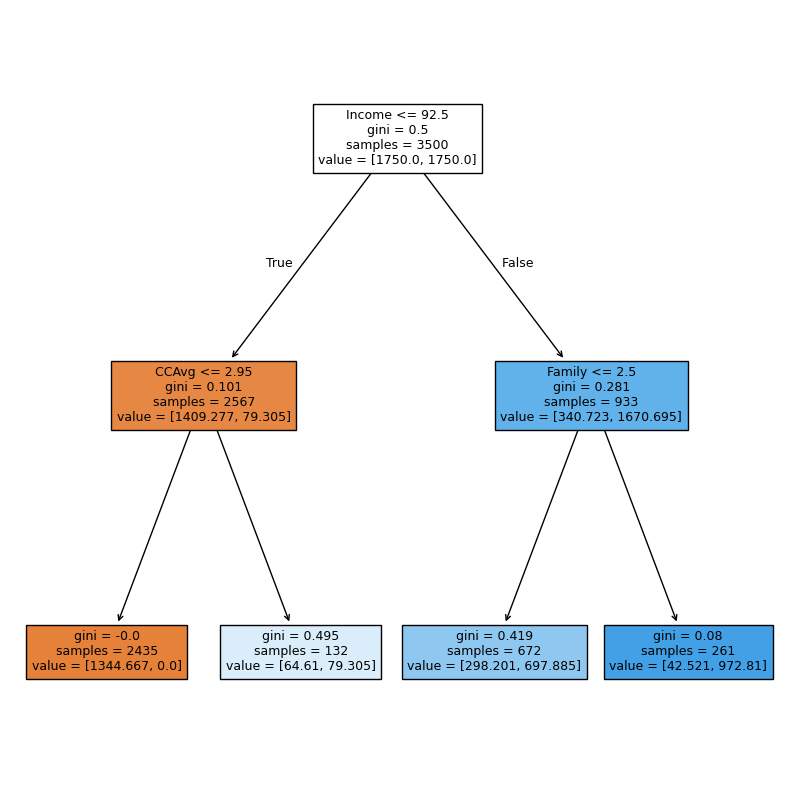

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The leaves show the final outcome. For instance, the leftmost leaf, which handles customers with lower incomes and low credit card spending, has a gini of 0.0, indicating perfect purity. This means the model is very confident that these customers will not accept a personal loan.

In [ ]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
# Importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Education_2         0.000000
Education_3         0.000000


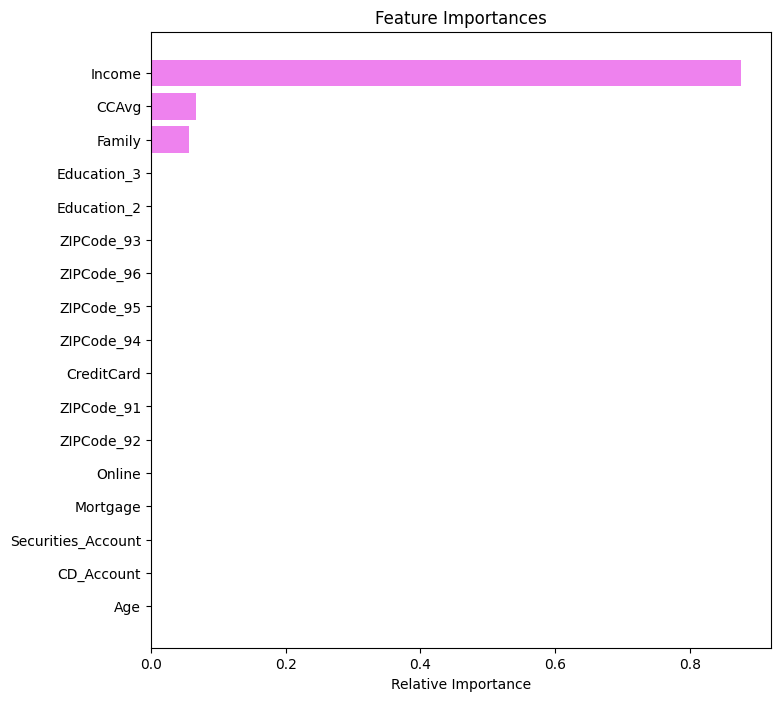

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The Income feature has by far the highest relative importance, indicating it's the most powerful feature for the model's predictions. The model relies on income more than any other variable to make its decisions.

* The CCAvg and Family size are the next most important features, but they are significantly less important than Income.

* Features like Online, Mortgage, Securities_Account, CD_Account, and Age have very low or near-zero importance. This means the model does not rely on these features to make its decisions.

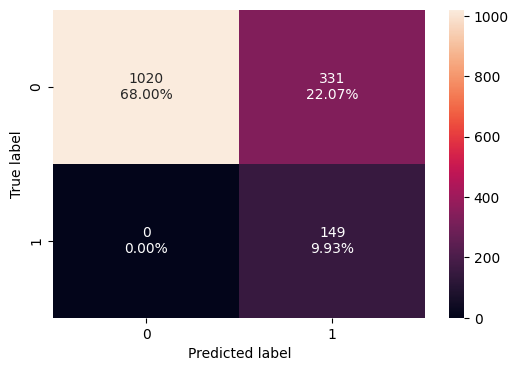

In [ ]:
# Check performance on the test data
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model1, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


In [ ]:
# Post-pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


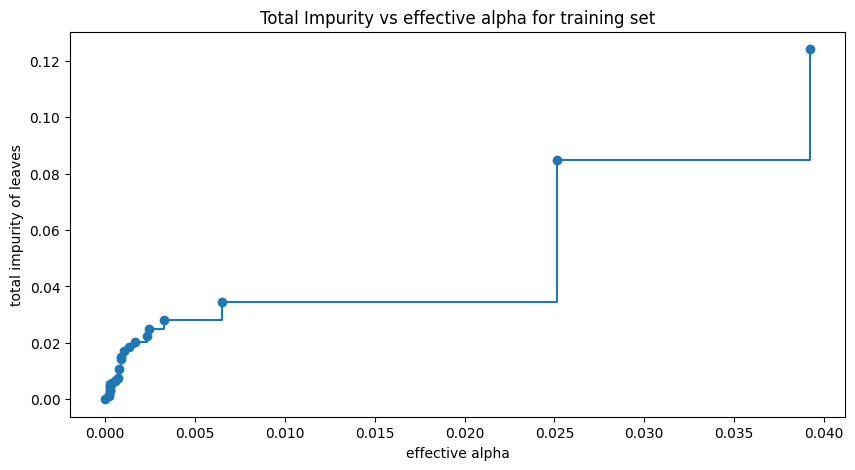

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


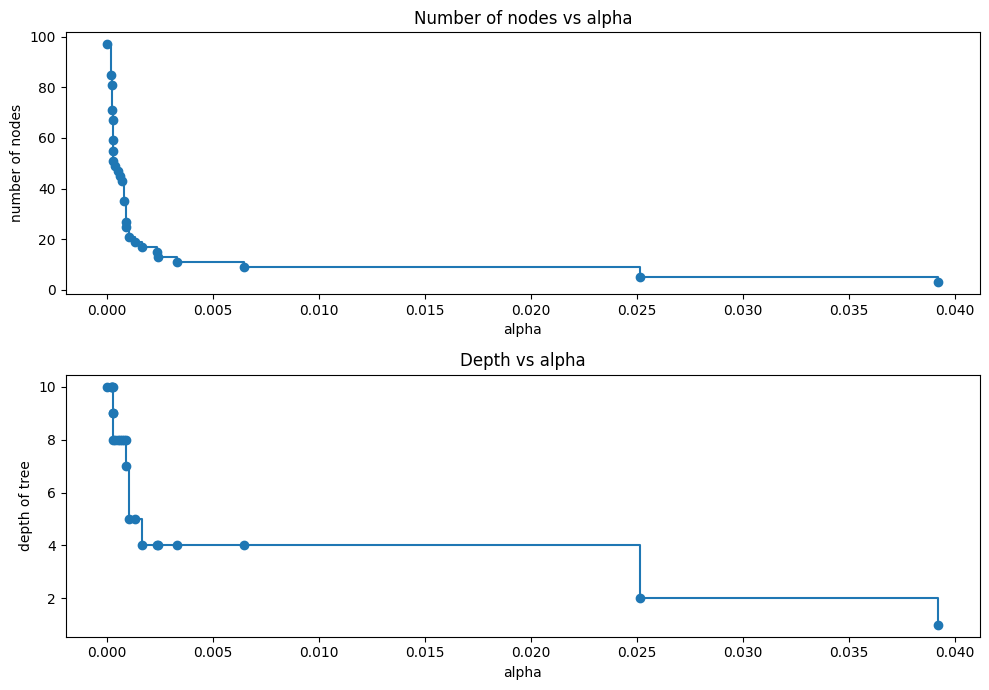

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Evaluate a series of pruned Decision Tree models, calculating the recall score for each one on both the training and test datasets.
# It stores these scores to help comparing the models and find the one with the best performance on new, unseen data.
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

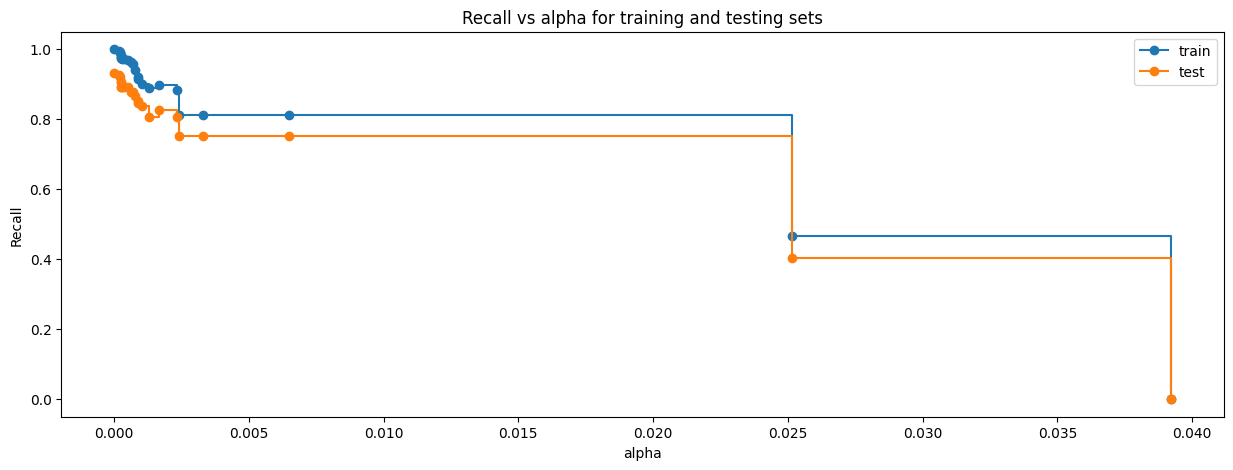

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* The chart shows a positive relationship: as effective alpha increases, the total impurity of the leaves also increases.

* Alpha is the key parameter for pruning the Decision Tree. Increasing alpha adds a penalty for having a more complex tree, which forces the model to prune branches and become simpler.

* The plot visualizes the trade-off between the complexity of the tree and its simplicity (high alpha, high impurity). An overly complex tree (far left) will overfit, while a tree that is too simple (far right) will not perform well.

In [ ]:
# Select the best-performing Decision Tree model from the list of pruned models
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [ ]:
# Address the class imbalance in the dataset. By assigning a higher weight (0.85) to the minority class (personal loan acceptance) and a lower weight (0.15) to the majority class (no loan acceptance), the model is instructed to pay more attention to correctly identifying the positive cases.
estimator_2 = DecisionTreeClassifier(ccp_alpha=best_model.ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0),
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

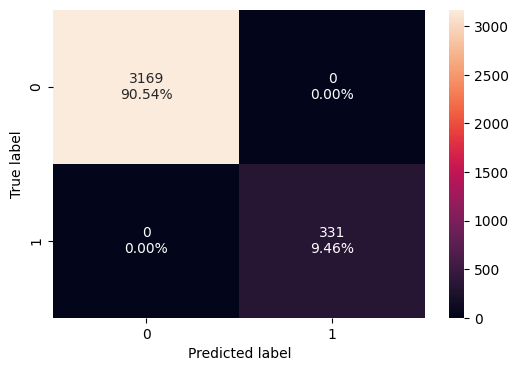

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


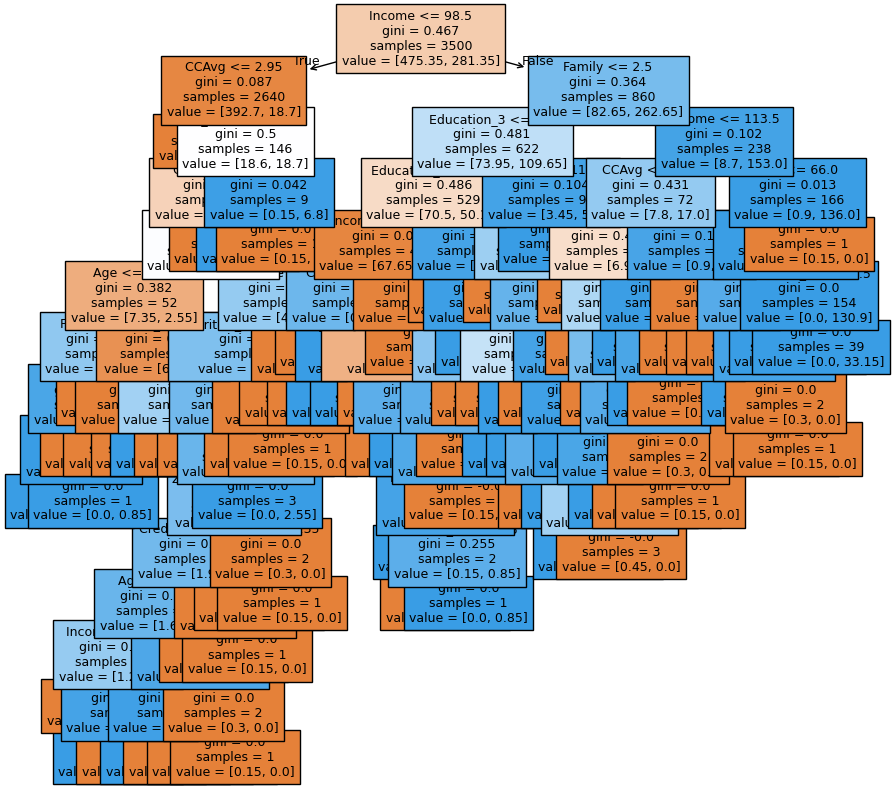

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Income <= 75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Income >  75.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 

In [ ]:
# Importance of features in the tree building (The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.597264
Education_2         0.138351
CCAvg               0.078877
Education_3         0.067293
Family              0.066244
Age                 0.018973
CD_Account          0.011000
Mortgage            0.005762
Securities_Account  0.004716
ZIPCode_94          0.004702
ZIPCode_91          0.003587
CreditCard          0.002428
ZIPCode_92          0.000802
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


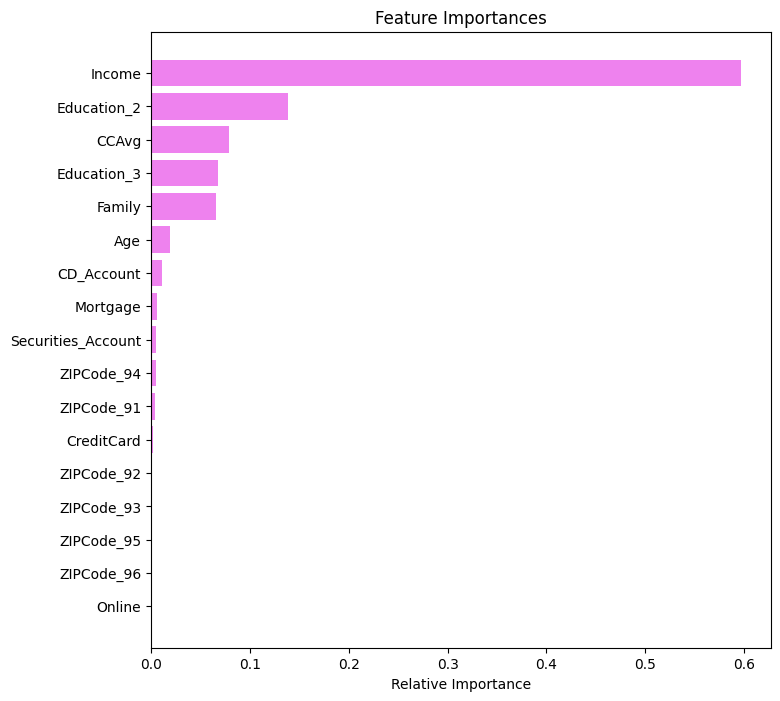

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* A bit different now, the second most important features are Education_2, CCAvg, Education_3, and Family.

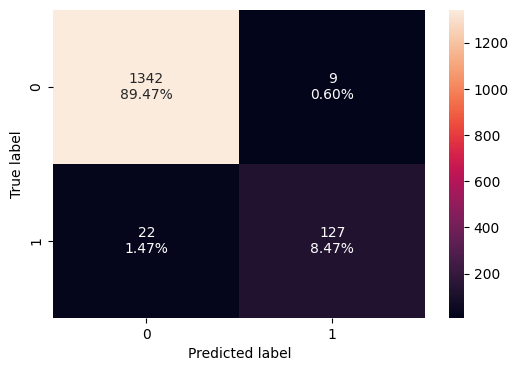

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.852349,0.933824,0.891228


## Model Performance Comparison and Final Model Selection

In [ ]:
# Train performance comparison
models_train_comp_df = pd.concat([decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,1.0
Recall,1.0,1.000000,1.0
Precision,1.0,0.310798,1.0
F1,1.0,0.474212,1.0


In [ ]:
# Test performance comparison
models_test_comp_df = pd.concat([decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.979333
Recall,0.932886,1.000000,0.852349
Precision,0.926667,0.310417,0.933824
F1,0.929766,0.473768,0.891228


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Training Performance**

Default Decision Tree: Achieved perfect scores (Accuracy, Precision, Recall, F1 = 1.0), which suggests strong fitting but also possible overfitting.

Pre-Pruning Tree: Lower Accuracy (79%) with Recall = 1.0 but very low Precision (0.31), meaning it predicts almost everyone as a loan acceptor.

Post-Pruning Tree: Also showed perfect scores on training, indicating pruning did not significantly reduce complexity.

**Test Performance**

Default Decision Tree: Accuracy ≈ 98.6%, Recall ≈ 0.93, Precision ≈ 0.93, F1 ≈ 0.93 → best overall balance between capturing loan acceptors and avoiding false positives.

Pre-Pruning Tree: Accuracy ≈ 77.9%, Recall = 1.0, Precision ≈ 0.31, F1 ≈ 0.47 → too many false positives, not practical for business use.

Post-Pruning Tree: Accuracy ≈ 97.9%, Recall ≈ 0.85, Precision ≈ 0.93, F1 ≈ 0.89 → strong precision but weaker recall, meaning some genuine acceptors are missed.

**Recommendation**

The Default Decision Tree is the recommended model for this campaign. It delivers the best overall generalization with high accuracy, strong recall, and high precision.

The Post-Pruning Tree may be considered if the bank wants to minimize marketing costs (fewer false positives) and can tolerate missing some potential customers.

The Pre-Pruning Tree is not suitable, as it produces too many false positives despite perfect recall.

**Business Interpretation**

For the bank’s personal loan campaign, the default Decision Tree model provides the most effective targeting strategy. It will help the bank identify customers who are likely to accept loans with high confidence (precision) while still capturing the majority of real loan acceptors (recall). This ensures an optimal balance between maximizing conversions and controlling marketing expenses.

___